In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
train_set = pd.read_csv('Train/train_set_one_hot_encoding_sin_secondary_use.csv')

train_set.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_a,plan_configuration_o,plan_configuration_m,plan_configuration_n,plan_configuration_f,legal_ownership_status_v,legal_ownership_status_a,legal_ownership_status_w,legal_ownership_status_r,damage_grade
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,1,0,0,0,3
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,1,0,0,0,2
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,1,0,0,0,3
3,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,1,0,0,0,2
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,1,0,0,0,3


In [3]:
X, y = train_set.iloc[:,:-1], train_set.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Pruebas manuales

In [4]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
f1 = f1_score(y_test, rf_preds, average='micro')
print("F1 Score", f1)

F1 Score 0.7097195042400523


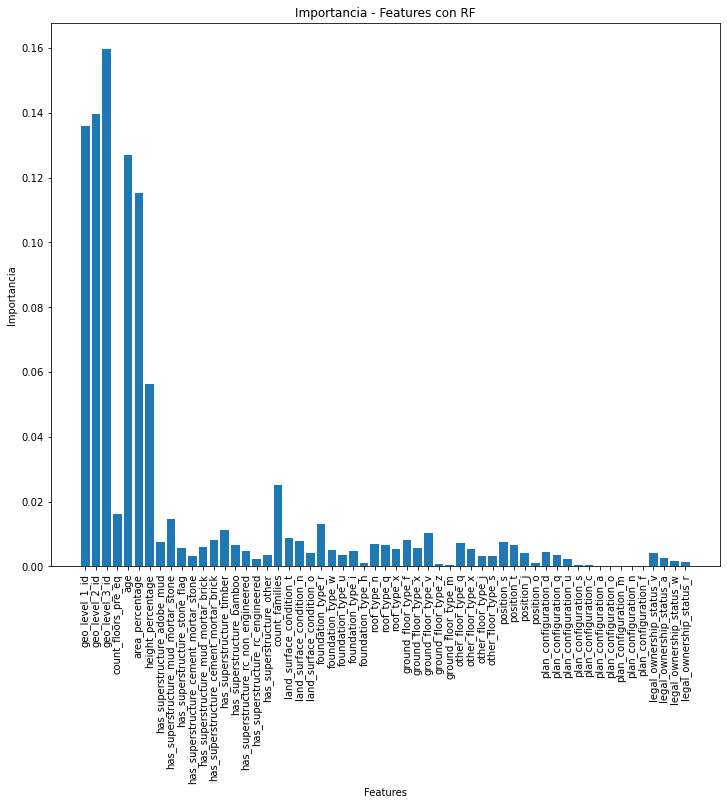

In [5]:
plt.figure(figsize=(12, 10))
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia - Features con RF')
plt.show()